In [1]:
import pandas as pd  # pandas library for dataframe
import numpy as np   # numpy library for number
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
UK_sales = pd.read_csv("UK_SALES_DATA.csv",encoding="latin1")

In [10]:
UK_sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_log,UnitPrice_log,Revenue,Revenue_log,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1.945910,1.266948,15.30,2.791165,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,1.479329,20.34,3.060583,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2.197225,1.321756,22.00,3.135494,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,1.479329,20.34,3.060583,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,1.479329,20.34,3.060583,2010,12,1


In [13]:
UK_sales["Revenue"] = UK_sales["Quantity"] * UK_sales["UnitPrice"]
UK_sales["Revenue_log"] = np.log1p(UK_sales["Revenue"])
# UK_sales["Revenue"] = UK_sales["Revenue"].astype("int32")
UK_sales["InvoiceDate"] = pd.to_datetime(UK_sales["InvoiceDate"], format="%Y-%m-%d %H:%M")
UK_sales["InvoiceDate"] = pd.to_datetime(UK_sales["InvoiceDate"])
UK_sales['Year'] = UK_sales['InvoiceDate'].dt.year
UK_sales['Month'] = UK_sales['InvoiceDate'].dt.month
UK_sales['Day'] = UK_sales['InvoiceDate'].dt.day

In [14]:
UK_sales["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
471664   2011-12-09 12:31:00
471665   2011-12-09 12:49:00
471666   2011-12-09 12:49:00
471667   2011-12-09 12:49:00
471668   2011-12-09 12:49:00
Name: InvoiceDate, Length: 471669, dtype: datetime64[ns]

In [15]:
UK_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_log,UnitPrice_log,Revenue,Revenue_log,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1.945910,1.266948,15.30,2.791165,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,1.479329,20.34,3.060583,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2.197225,1.321756,22.00,3.135494,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,1.479329,20.34,3.060583,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.945910,1.479329,20.34,3.060583,2010,12,1


In [5]:
UK_sales['Year'] = UK_sales['Year'].astype("int16")
UK_sales['Month'] = UK_sales['Month'].astype("int8")
UK_sales['Day'] = UK_sales['Day'].astype("int8")

In [6]:
UK_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471669 entries, 0 to 471668
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      471669 non-null  int64         
 1   StockCode      471669 non-null  object        
 2   Description    471669 non-null  object        
 3   Quantity       471669 non-null  int64         
 4   InvoiceDate    471669 non-null  datetime64[ns]
 5   UnitPrice      471669 non-null  float64       
 6   CustomerID     471669 non-null  int64         
 7   Country        471669 non-null  object        
 8   Quantity_log   471669 non-null  float64       
 9   UnitPrice_log  471669 non-null  float64       
 10  Revenue        471669 non-null  int32         
 11  Revenue_log    471669 non-null  float64       
 12  Year           471669 non-null  int16         
 13  Month          471669 non-null  int8          
 14  Day            471669 non-null  int8          
dtype

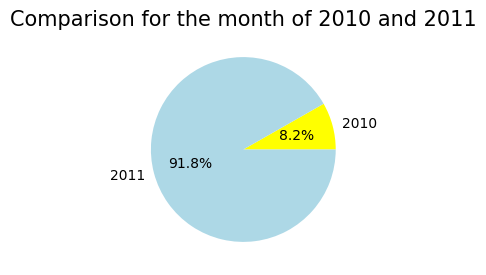

In [92]:
plt.figure(figsize=(10,3))
plt.pie(UK_sales.groupby("Year")["Revenue"].sum().values, labels=UK_sales.groupby("Year")["Revenue"].sum().index, autopct='%1.1f%%', colors=["yellow","lightblue"]);
plt.title("Comparison for the month of 2010 and 2011", fontsize = 15);

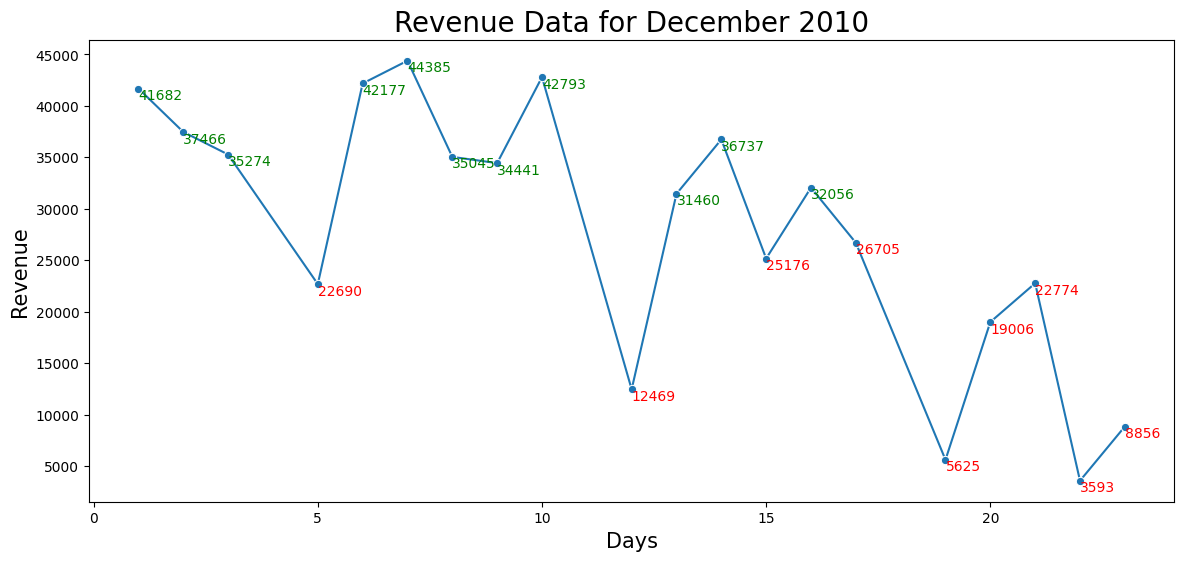

In [127]:
avg_price_dec2010 = UK_sales[(UK_sales["Year"] == 2010) & (UK_sales["Month"] == 12)].groupby("Day")["Revenue"].sum().mean()

# Filter and group data
data_dec2010 = UK_sales[(UK_sales["Year"] == 2010) & (UK_sales["Month"] == 12)].groupby("Day")["Revenue"].sum()

# Create the line plot
plt.figure(figsize=(14, 6))
ax = sns.lineplot(
    x=data_dec2010.index,
    y=data_dec2010.values,
    marker="o"  # Use `marker` instead of `markers`
)

# Set labels and title
plt.ylabel("Revenue", fontsize=15)
plt.xlabel("Days", fontsize=15)
plt.title("Revenue Data for December 2010", fontsize=20)

# Annotate points
for x, y in zip(data_dec2010.index, data_dec2010.values):
    color = "green" if y > avg_price_dec2010 else "red"
    plt.text(x, y, f'{y}', ha="left", va='top', color=color)


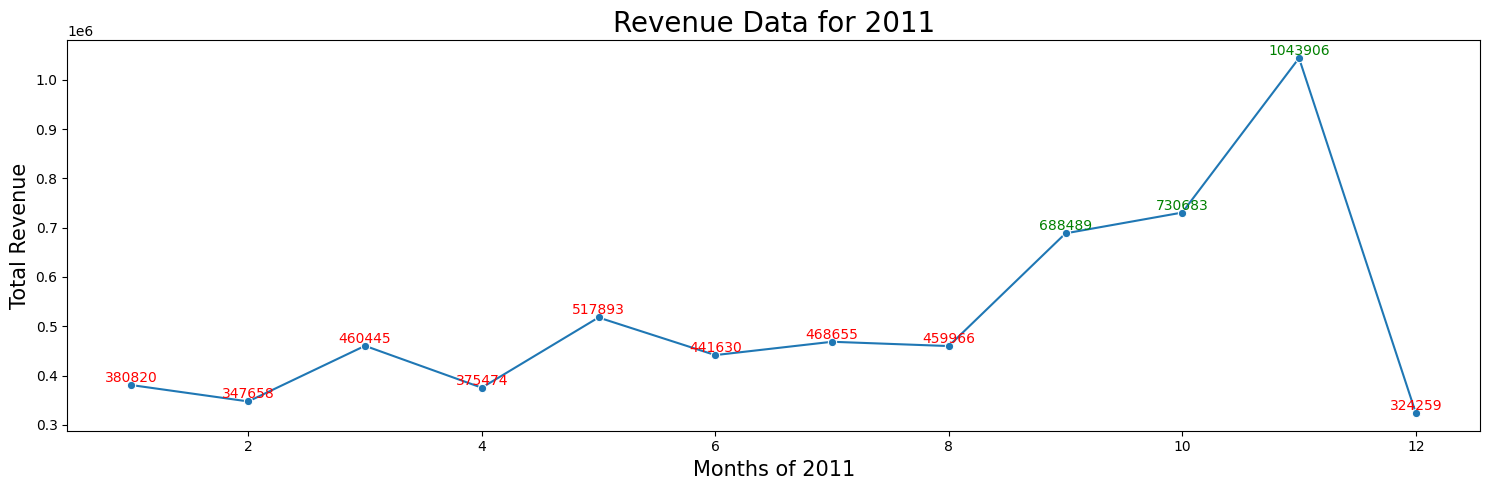

In [132]:
# Filter and group data for the year 2011
data_2011 = UK_sales[UK_sales["Year"] == 2011].groupby("Month")["Revenue"].sum()

# Calculate the mean revenue for 2011
mean_2011 = data_2011.mean()

# Create the line plot
plt.figure(figsize=(15, 5))
sns.lineplot(
    x=data_2011.index,
    y=data_2011.values,
    marker="o"
)
plt.ylabel("Total Revenue", fontsize=15)
plt.xlabel("Months of 2011", fontsize=15)
plt.title("Revenue Data for 2011", fontsize=20)

# Annotate points
for x, y in zip(data_2011.index, data_2011.values):
    color = "green" if y > mean_2011 else "red"
    plt.text(x, y, f'{y}', ha="center", va="bottom", color=color)

plt.tight_layout()
plt.show()

### Q. What are the top most selling items (monthly) in the year of 2011

Text(0.5, 1.0, 'Highest 5 selling products in the month of the year 2011 in the terms of revenue and consistency')

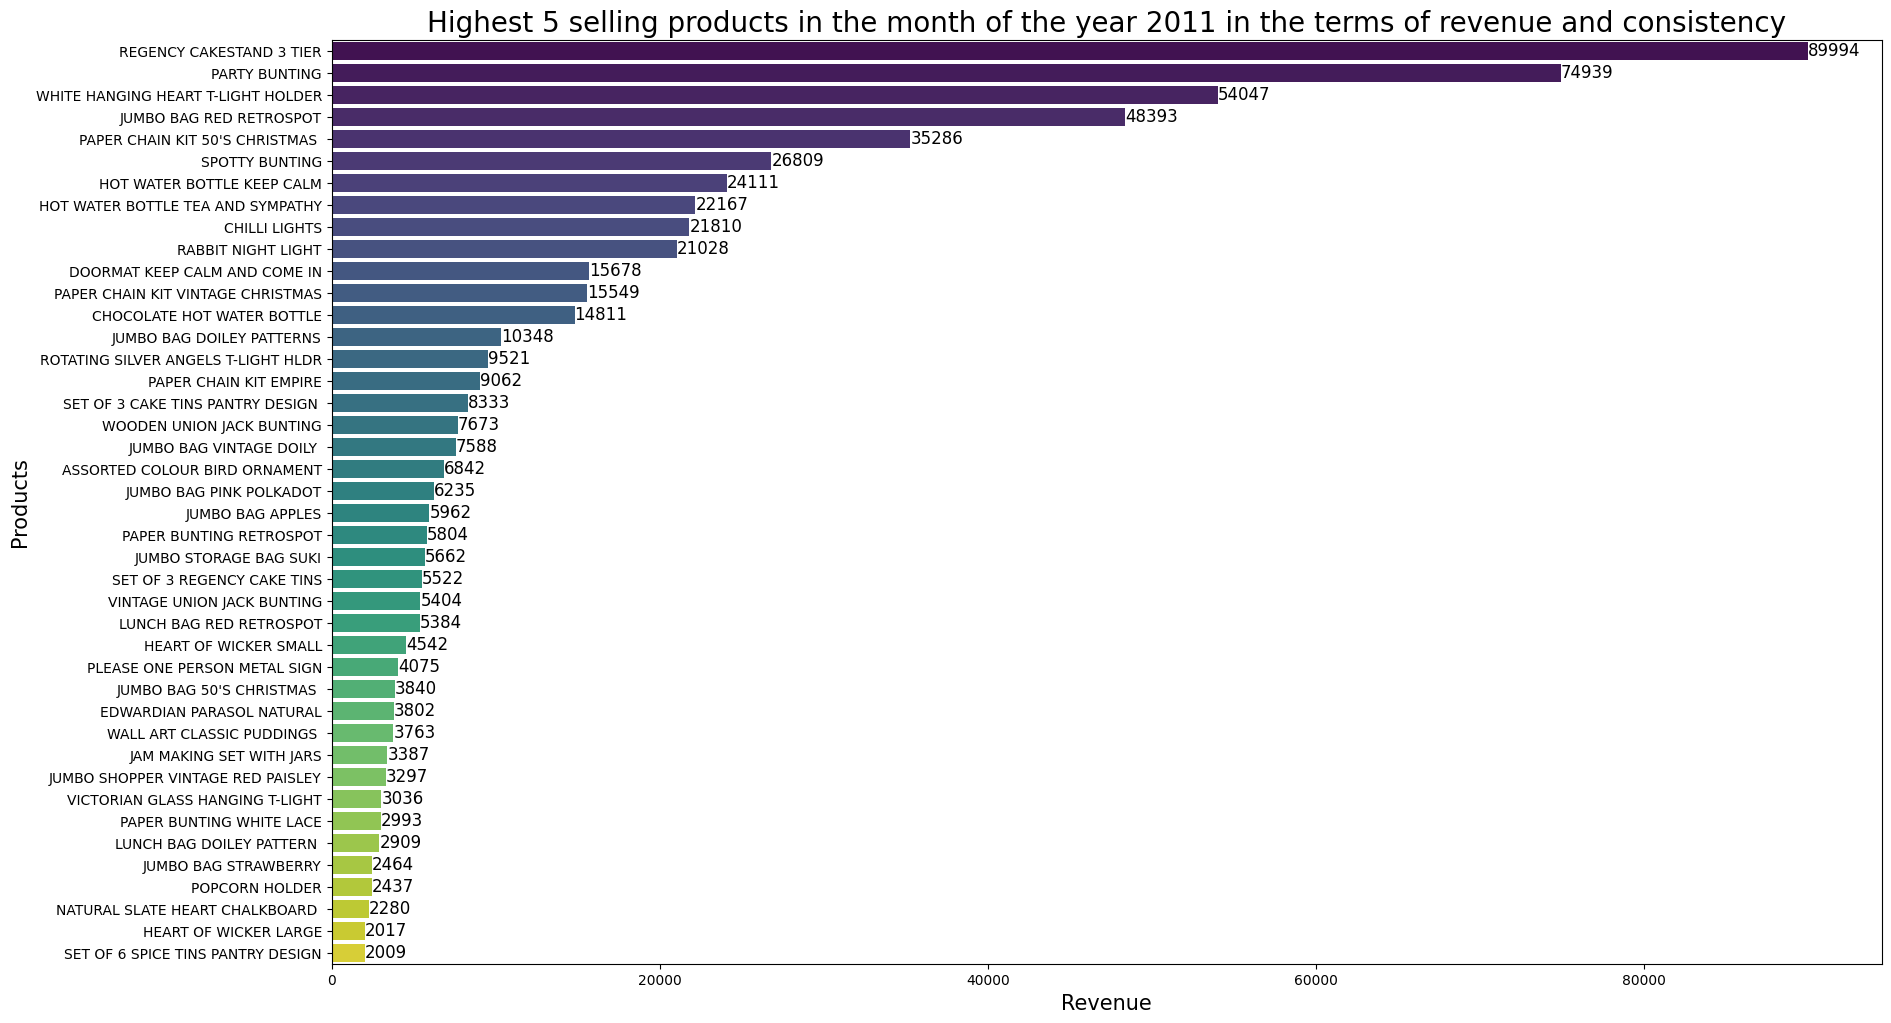

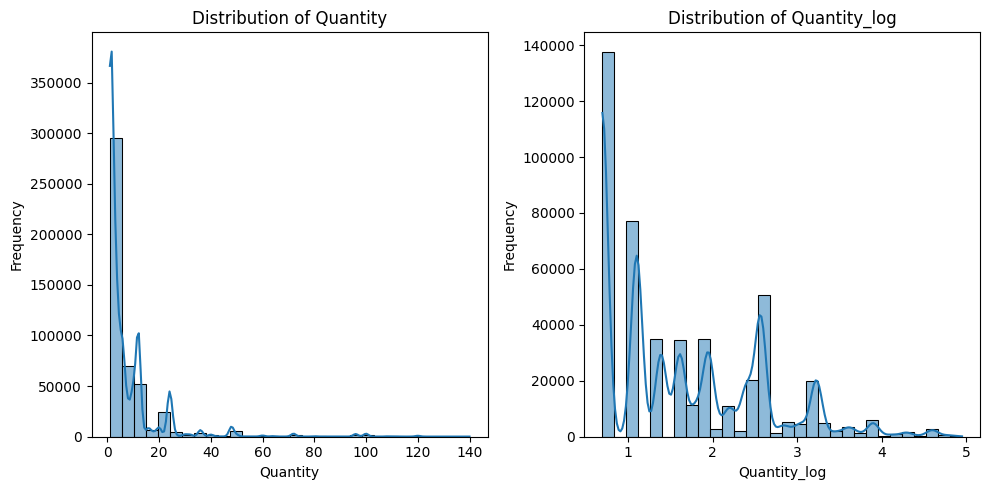

In [7]:
plt.figure(figsize=(10, 5))
bins=30
plt.subplot(1,2,1)  
sns.histplot(UK_sales["Quantity"], kde=True, bins=bins)
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")

plt.subplot(1,2,2)  
sns.histplot(UK_sales["Quantity_log"], kde=True, bins=bins)
plt.title("Distribution of Quantity_log")
plt.xlabel("Quantity_log")
plt.ylabel("Frequency")

plt.tight_layout()  
plt.show()

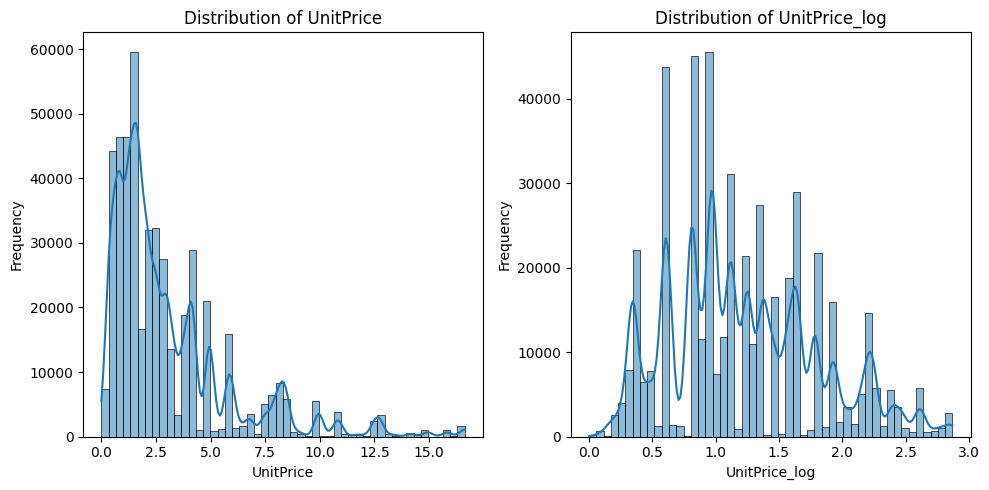

In [8]:
plt.figure(figsize=(10, 5))
bins=50
plt.subplot(1,2,1)  # Arrange the subplots in a 2x2 grid
sns.histplot(UK_sales["UnitPrice"], kde=True, bins=bins)
plt.title("Distribution of UnitPrice")
plt.xlabel("UnitPrice")
plt.ylabel("Frequency")

plt.subplot(1,2,2)  # Arrange the subplots in a 2x2 grid
sns.histplot(UK_sales["UnitPrice_log"], kde=True, bins=bins)
plt.title("Distribution of UnitPrice_log")
plt.xlabel("UnitPrice_log")
plt.ylabel("Frequency")

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

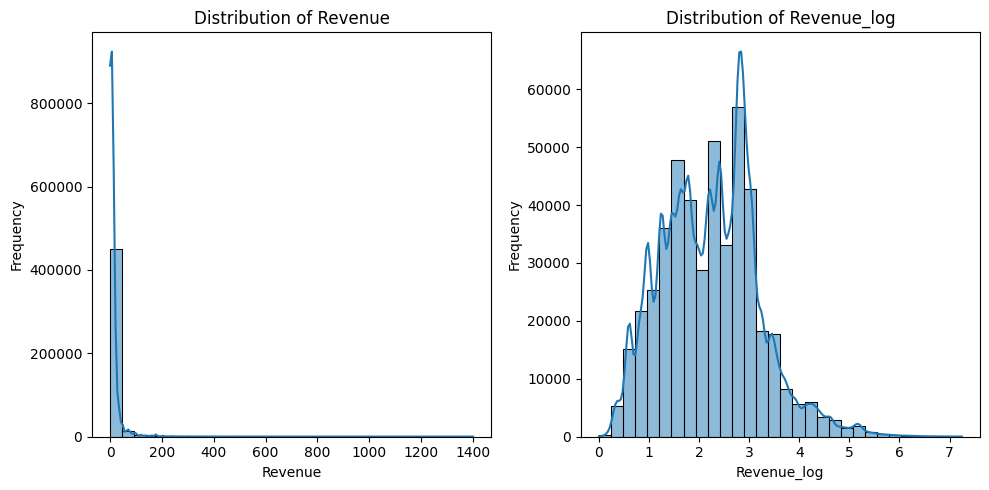

In [9]:
plt.figure(figsize=(10, 5))
bins=30
plt.subplot(1,2,1)  # Arrange the subplots in a 2x2 grid
sns.histplot(UK_sales["Revenue"], kde=True, bins=bins)
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")

plt.subplot(1,2,2)  # Arrange the subplots in a 2x2 grid
sns.histplot(UK_sales["Revenue_log"], kde=True, bins=bins)
plt.title("Distribution of Revenue_log")
plt.xlabel("Revenue_log")
plt.ylabel("Frequency")

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

In [10]:
print("The skewness of the column Quantity is", UK_sales["Quantity"].skew())
print("The skewness of the column Quantity_log is", UK_sales["Quantity_log"].skew())
print("The skewness of the column UnitPrice is", UK_sales["UnitPrice"].skew())
print("The skewness of the column UnitPrice_log is", UK_sales["UnitPrice_log"].skew())
print("The skewness of the column Revenue is", UK_sales["Revenue"].skew())
print("The skewness of the column Revenue_log is", UK_sales["Revenue_log"].skew())

The skewness of the column Quantity is 4.504115233645763
The skewness of the column Quantity_log is 0.8453509092906621
The skewness of the column UnitPrice is 1.9353205604978827
The skewness of the column UnitPrice_log is 0.5024048531696658
The skewness of the column Revenue is 11.120849865167244
The skewness of the column Revenue_log is 0.3923171111842311


In [11]:
UK_sales.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_log,UnitPrice_log,Revenue,Revenue_log,Year,Month,Day
373296,573585,85054,FRENCH ENAMEL POT W LID,2,2011-10-31,5.79,16705,United Kingdom,1.098612,1.915451,11,2.532108,2011,10,31


In [12]:
print("The Count of Unique Invoice Generated",UK_sales["InvoiceNo"].nunique())
print("Unique Invoice number",UK_sales["InvoiceNo"].unique())

The Count of Unique Invoice Generated 17497
Unique Invoice number [536365 536366 536367 ... 581584 581585 581586]


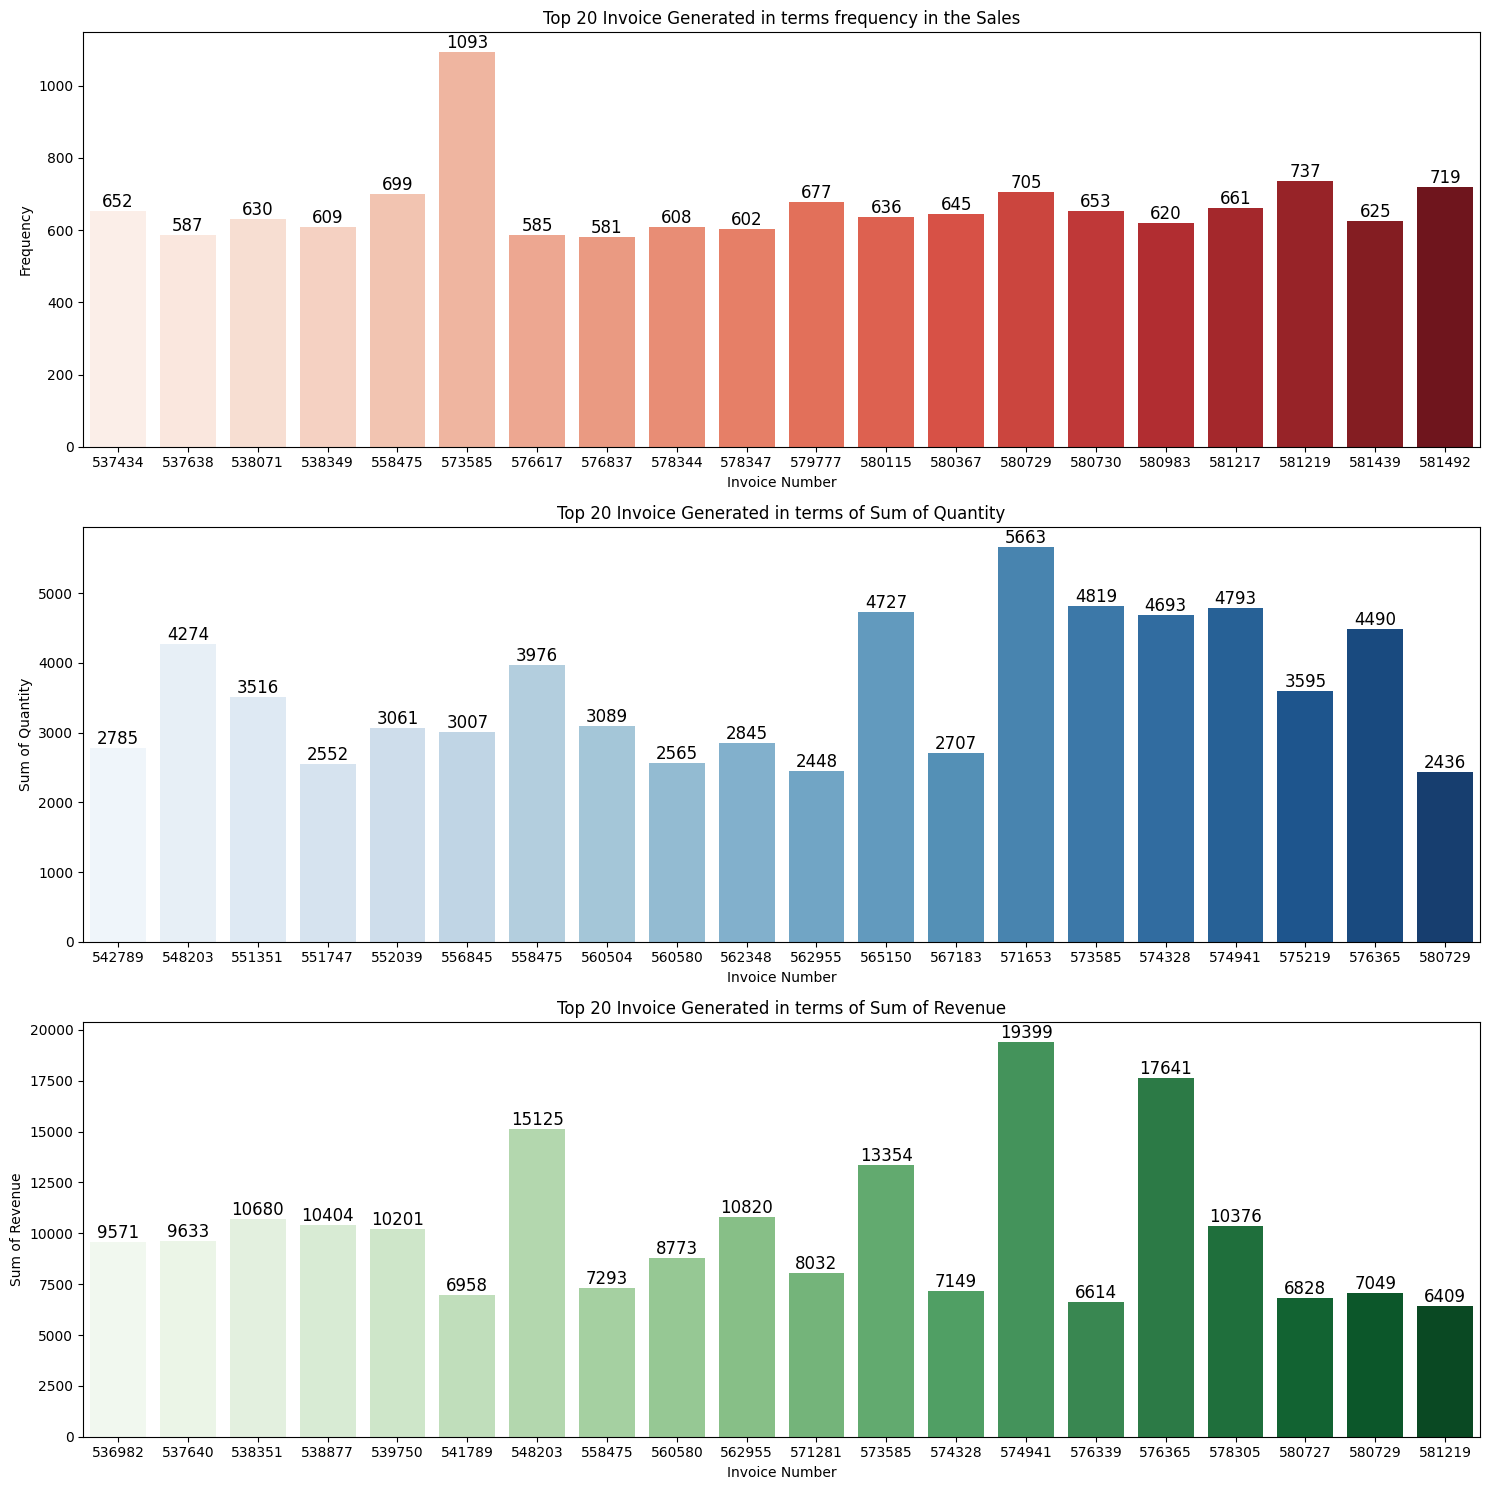

In [13]:
plt.figure(figsize=(15, 15))

plt.subplot(3,1,1) 
ax = sns.barplot(UK_sales["InvoiceNo"].value_counts().head(20),palette="Reds")
plt.title("Top 20 Invoice Generated in terms frequency in the Sales")
plt.xlabel("Invoice Number")
plt.ylabel("Frequency")
for container in ax.containers:
    ax.bar_label(container, fontsize=12)
    
plt.subplot(3,1,2) 
ax = sns.barplot(
    x = UK_sales.groupby("InvoiceNo").agg({"Quantity": "sum"}).sort_values(by="Quantity", ascending=False).head(20).index,
    y = UK_sales.groupby("InvoiceNo").agg({"Quantity": "sum"}).sort_values(by="Quantity", ascending=False).head(20)["Quantity"],palette="Blues")
plt.title("Top 20 Invoice Generated in terms of Sum of Quantity")
plt.xlabel("Invoice Number")
plt.ylabel("Sum of Quantity")
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

plt.subplot(3,1,3) 
ax = sns.barplot(
    x = UK_sales.groupby("InvoiceNo").agg({"Revenue": "sum"}).sort_values(by="Revenue", ascending=False).head(20).index,
    y = UK_sales.groupby("InvoiceNo").agg({"Revenue": "sum"}).sort_values(by="Revenue", ascending=False).head(20)["Revenue"],palette="Greens")
plt.title("Top 20 Invoice Generated in terms of Sum of Revenue")
plt.xlabel("Invoice Number")
plt.ylabel("Sum of Revenue")
for container in ax.containers:
    ax.bar_label(container, fontsize=12)


plt.tight_layout()
plt.show()

In [14]:
print("The Count of CustomerID in the sales",UK_sales["CustomerID"].nunique())
print("Unique CustomerID",UK_sales["CustomerID"].unique())

The Count of CustomerID in the sales 3877
Unique CustomerID [17850 13047 13748 ... 15520 13298 14569]


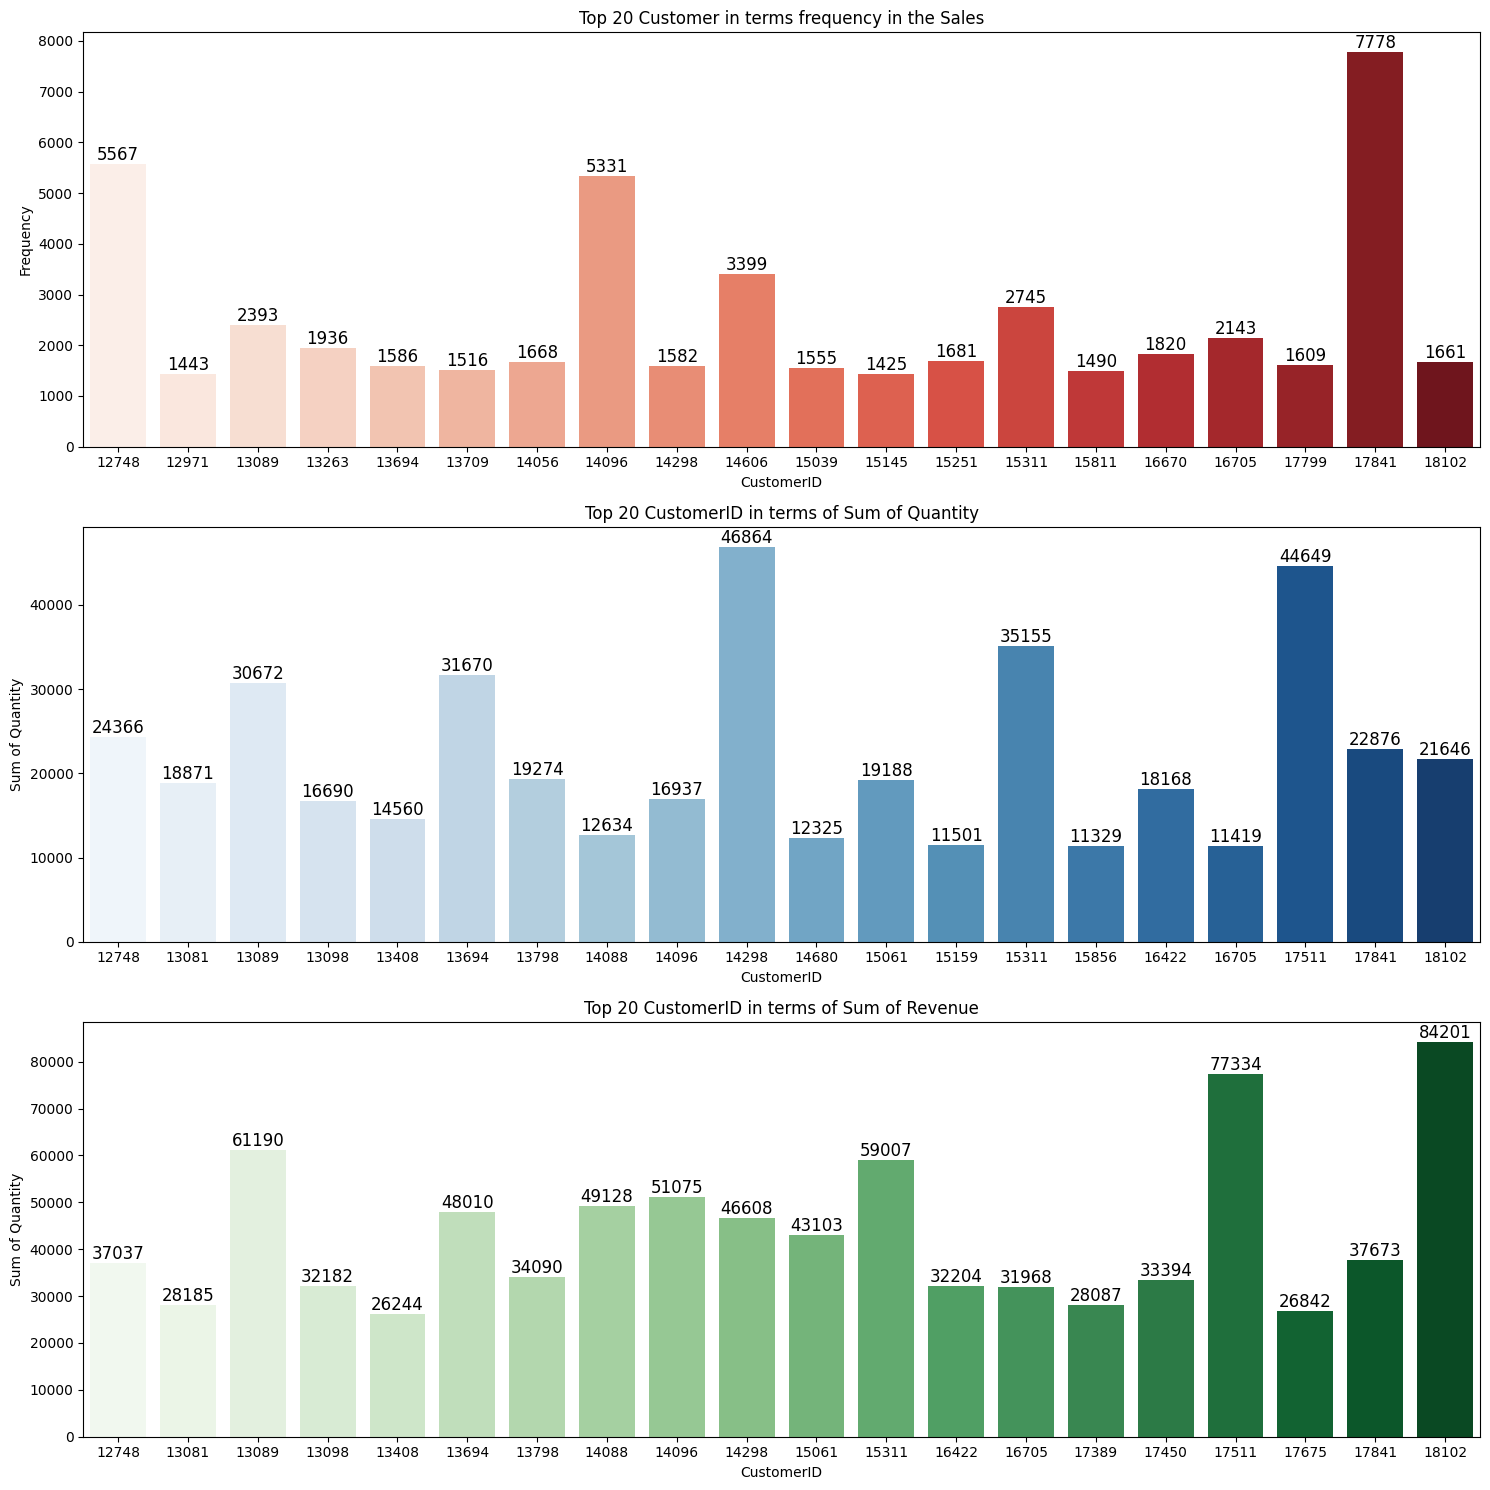

In [15]:
plt.figure(figsize=(15, 15))

plt.subplot(3,1,1) 
ax = sns.barplot(UK_sales["CustomerID"].value_counts().head(20),palette="Reds")
plt.title("Top 20 Customer in terms frequency in the Sales")
plt.xlabel("CustomerID")
plt.ylabel("Frequency")
for container in ax.containers:
    ax.bar_label(container, fontsize=12)
    
plt.subplot(3,1,2) 
ax = sns.barplot(
    x = UK_sales.groupby("CustomerID").agg({"Quantity": "sum"}).sort_values(by="Quantity", ascending=False).head(20).index,
    y = UK_sales.groupby("CustomerID").agg({"Quantity": "sum"}).sort_values(by="Quantity", ascending=False).head(20)["Quantity"],palette="Blues")
plt.title("Top 20 CustomerID in terms of Sum of Quantity")
plt.xlabel("CustomerID")
plt.ylabel("Sum of Quantity")
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

plt.subplot(3,1,3) 
ax = sns.barplot(
    x = UK_sales.groupby("CustomerID").agg({"Revenue": "sum"}).sort_values(by="Revenue", ascending=False).head(20).index,
    y = UK_sales.groupby("CustomerID").agg({"Revenue": "sum"}).sort_values(by="Revenue", ascending=False).head(20)["Revenue"],palette="Greens")
plt.title("Top 20 CustomerID in terms of Sum of Revenue")
plt.xlabel("CustomerID")
plt.ylabel("Sum of Quantity")
for container in ax.containers:
    ax.bar_label(container, fontsize=12)
    
plt.tight_layout()
plt.show()

In [16]:
UK_sales.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_log,UnitPrice_log,Revenue,Revenue_log,Year,Month,Day
164159,552973,20971,PINK BLUE FELT CRAFT TRINKET BOX,12,2011-05-12,1.25,16186,United Kingdom,2.564949,0.81093,15,2.772589,2011,5,12


In [17]:
print("The Count of Unique Stock Codes",UK_sales["StockCode"].nunique())
print("Unique Stock Codes",UK_sales["StockCode"].unique())

The Count of Unique Stock Codes 3864
Unique Stock Codes ['85123A' '71053' '84406B' ... '84679' '47591b' '72783']


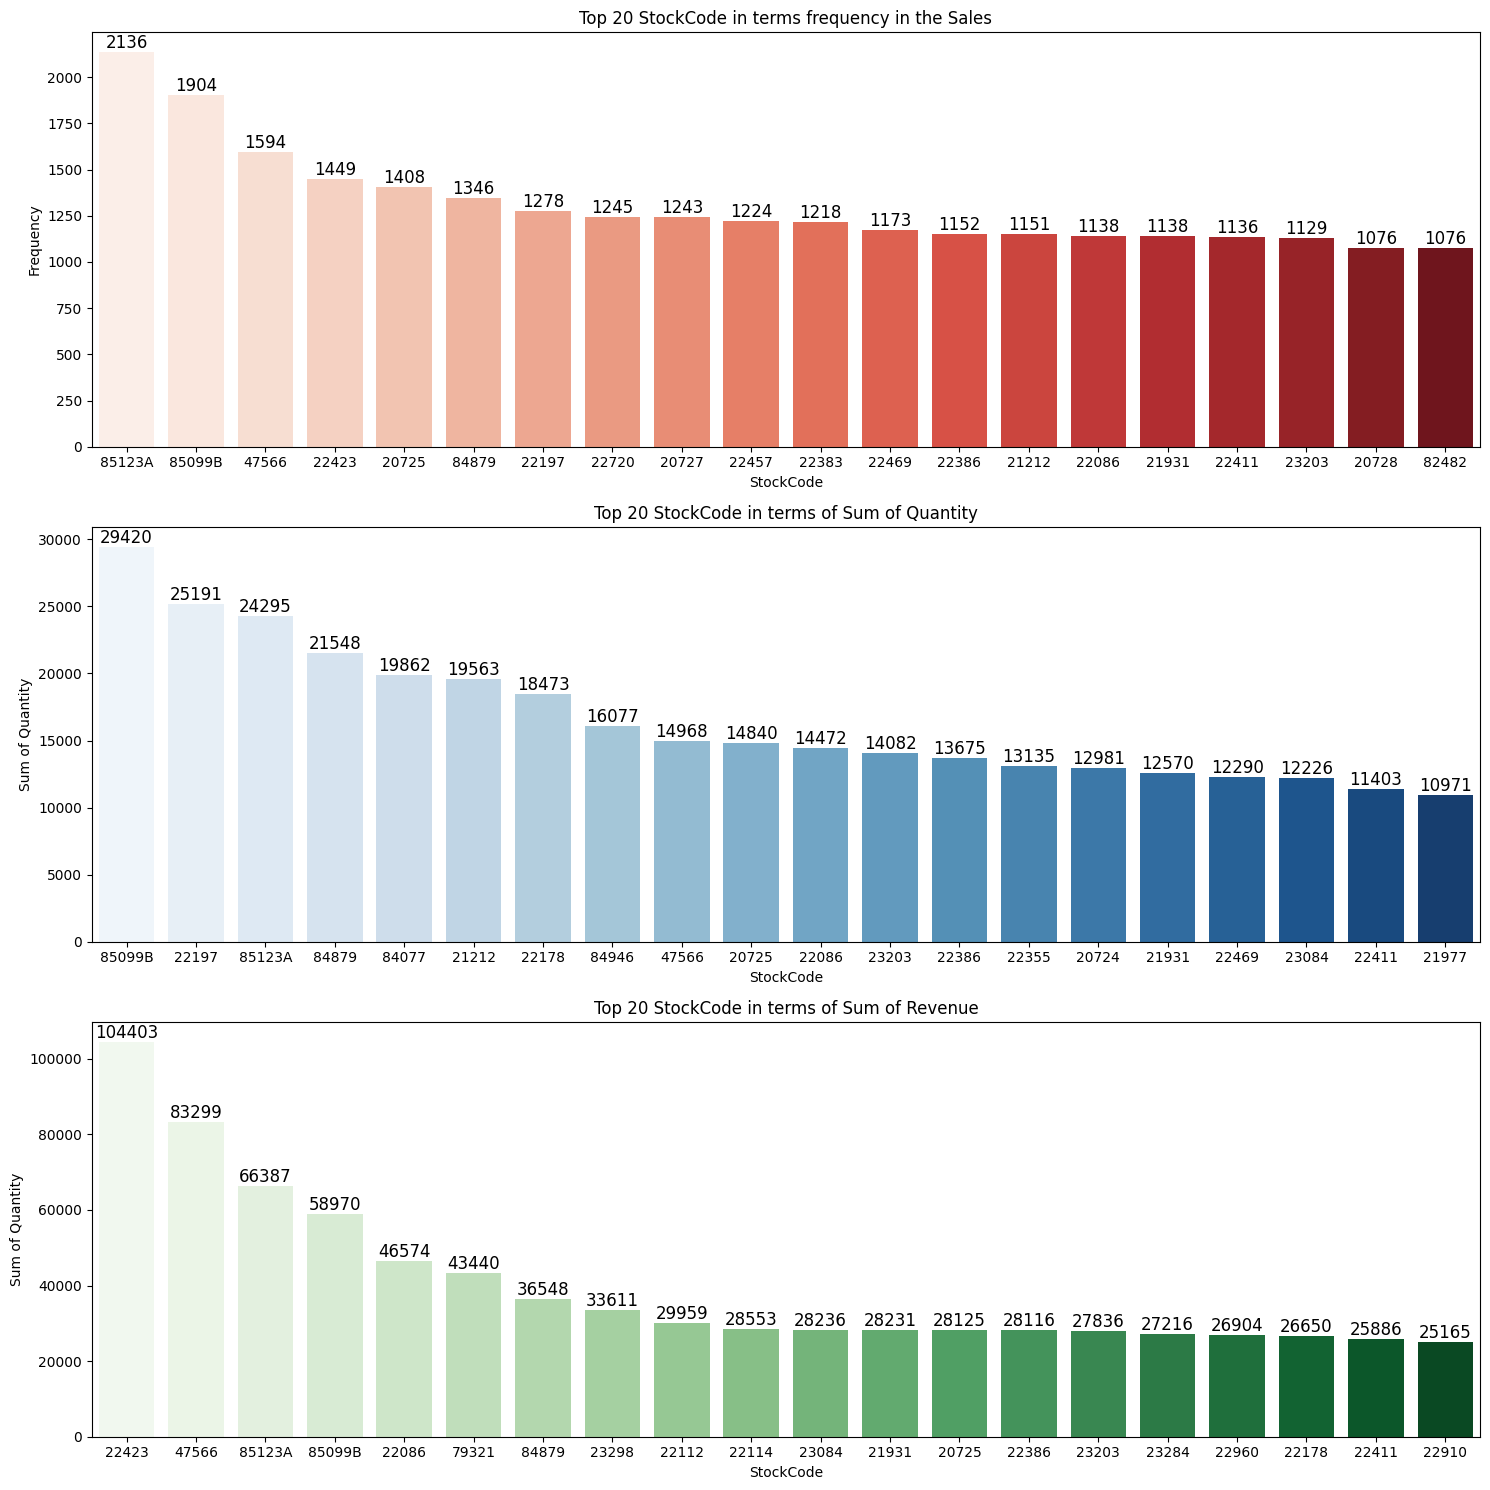

In [18]:
plt.figure(figsize=(15, 15))

plt.subplot(3,1,1) 
ax = sns.barplot(UK_sales["StockCode"].value_counts().head(20),palette="Reds")
plt.title("Top 20 StockCode in terms frequency in the Sales")
plt.xlabel("StockCode")
plt.ylabel("Frequency")
for container in ax.containers:
    ax.bar_label(container, fontsize=12)
    
plt.subplot(3,1,2) 
ax = sns.barplot(
    x = UK_sales.groupby("StockCode").agg({"Quantity": "sum"}).sort_values(by="Quantity", ascending=False).head(20).index,
    y = UK_sales.groupby("StockCode").agg({"Quantity": "sum"}).sort_values(by="Quantity", ascending=False).head(20)["Quantity"],palette="Blues")
plt.title("Top 20 StockCode in terms of Sum of Quantity")
plt.xlabel("StockCode")
plt.ylabel("Sum of Quantity")
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

plt.subplot(3,1,3) 
ax = sns.barplot(
    x = UK_sales.groupby("StockCode").agg({"Revenue": "sum"}).sort_values(by="Revenue", ascending=False).head(20).index,
    y = UK_sales.groupby("StockCode").agg({"Revenue": "sum"}).sort_values(by="Revenue", ascending=False).head(20)["Revenue"],palette="Greens")
plt.title("Top 20 StockCode in terms of Sum of Revenue")
plt.xlabel("StockCode")
plt.ylabel("Sum of Quantity")
for container in ax.containers:
    ax.bar_label(container, fontsize=12)
    
plt.tight_layout()
plt.show()

In [57]:
least_selling_stock_codes=[]
value_counts = UK_sales["StockCode"].value_counts()

# Loop through each unique StockCode
for stock_code in value_counts.index:
    # Check if the count for the current stock code is between 0 and 5
    if value_counts[stock_code] <= 5:
        least_selling_stock_codes.append(stock_code)


In [66]:
print("List of the least selling item in the data based on the quantity",least_selling_stock_codes)

List of the least selling item in the data ['84804B', '20798', '90162D', '90152A', '84745B', '23646', '84745A', '62043B', '35001W', '17109D', '84558a', '72807c', '22206', '35400', '22987', '90012A', '90042C', '90082D', '90040A', '90154', '90037C', '84596b', '20818', '90120D', '90214W', '90027C', '84597B', '90036F', '40046A', '84801A', '72807a', '23486', '23634', '90179A', '84921', '90123D', '90036C', '90159', '90182B', '47344B', '21637', '81953B', '90180B', '10124A', '90196A', '35443', '84858C', '90001C', '47518f', '90055', '85089', '35638A', '90036D', '23644', '44092B', '90163B', '84984B', '90123B', '90196B', '90214O', '90157', '23615', '21785', '71496B', '37491A', '90142D', '21344', '90038C', '62074B', '23645', '84691', '90141B', '84984D', '90025F', '84536a', '20695', '23601', '90001A', '90037B', '84548', '90065A', '40005B', '84575A', '23440', '79062D', '23303', '90030A', '82613c', '85028L', '84270', '23654', '47013A', '35638B', '22034', '23650', '85189', '84805A', '72821', '90001D',

In [73]:
print(f'Revenue generated from the least selling item in the data: ${UK_sales[UK_sales["StockCode"].isin(least_selling_stock_codes)]["Revenue"].sum()}')

List of the revenue generated from the least selling item in the data: $14313


In [75]:
UK_sales.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_log,UnitPrice_log,Revenue,Revenue_log,Year,Month,Day
385228,574744,23543,WALL ART KEEP CALM,2,2011-11-07,8.25,16612,United Kingdom,1.098612,2.224623,16,2.862201,2011,11,7
206629,557855,22879,NUMBER TILE VINTAGE FONT 0,2,2011-06-23,1.95,16806,United Kingdom,1.098612,1.081805,3,1.589235,2011,6,23
240336,561026,23005,TRAVEL CARD WALLET I LOVE LONDON,5,2011-07-24,0.42,17265,United Kingdom,1.791759,0.350657,2,1.131402,2011,7,24
310620,568147,22796,PHOTO FRAME 3 CLASSIC HANGING,4,2011-09-25,9.95,15044,United Kingdom,1.609438,2.393339,39,3.708682,2011,9,25
36542,539750,22835,HOT WATER BOTTLE I AM SO POORLY,10,2010-12-21,7.62,16996,United Kingdom,2.397895,2.154085,76,4.346399,2010,12,21


Text(0.5, 1.0, 'Highest 10 selling products in the month of the year 2011 in the terms of revenue and consistency')

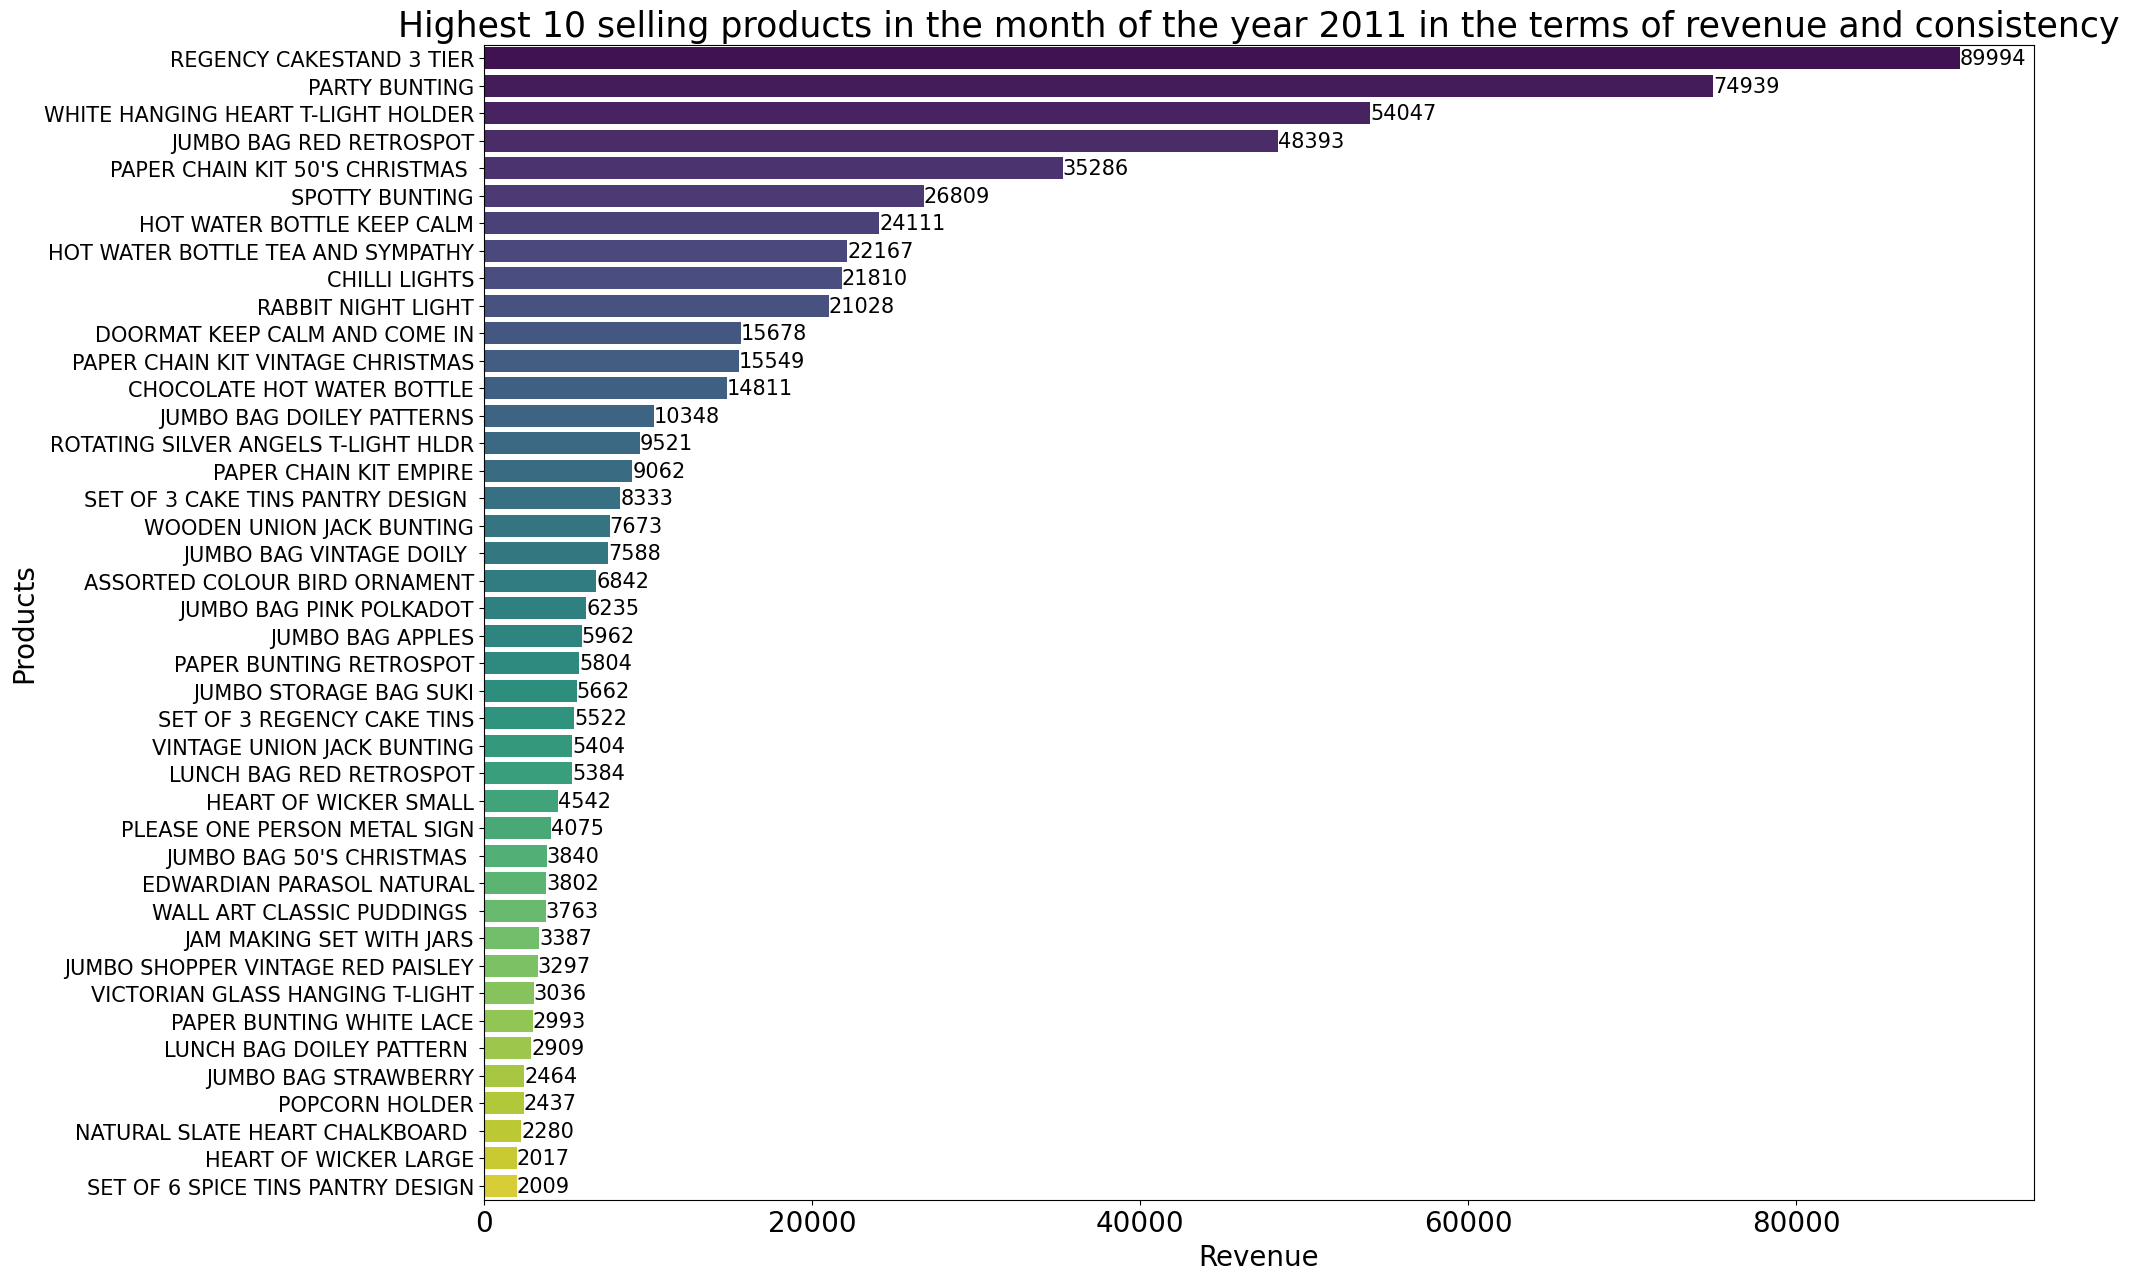

In [160]:
top_10_by_month = {}
for i in UK_sales[UK_sales["Year"] == 2011]["Month"].unique():
     top_10_by_month[i] = (
        UK_sales[(UK_sales["Year"] == 2011) & (UK_sales["Month"] == i)]
        .groupby("Description")["Revenue"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .rename_axis(None)
    )

top_10_by_2011_month = pd.DataFrame(top_10_by_month)

plt.figure(figsize=(20, 15))
ax = sns.barplot(
    y = top_10_by_2011_month.sum(axis=1).sort_values(ascending=False).index,
    x = top_10_by_2011_month.sum(axis=1).sort_values(ascending=False).values,
    palette='viridis' )
plt.yticks(fontsize=15)
plt.xticks(fontsize=20)
for container in ax.containers:
    ax.bar_label(container, fontsize=15)
plt.xlabel("Revenue",fontsize = 20)
plt.ylabel("Products",fontsize = 20)
plt.title("Highest 10 selling products in the month of the year 2011 in the terms of revenue and consistency", fontsize = 25)



In [156]:
top_10_by_2011_month_map = top_10_by_2011_month.applymap(lambda x: 0 if pd.isna(x) else 1)
top_10_by_2011_month_map["Sum"] = top_10_by_2011_month_map.sum(axis=1)

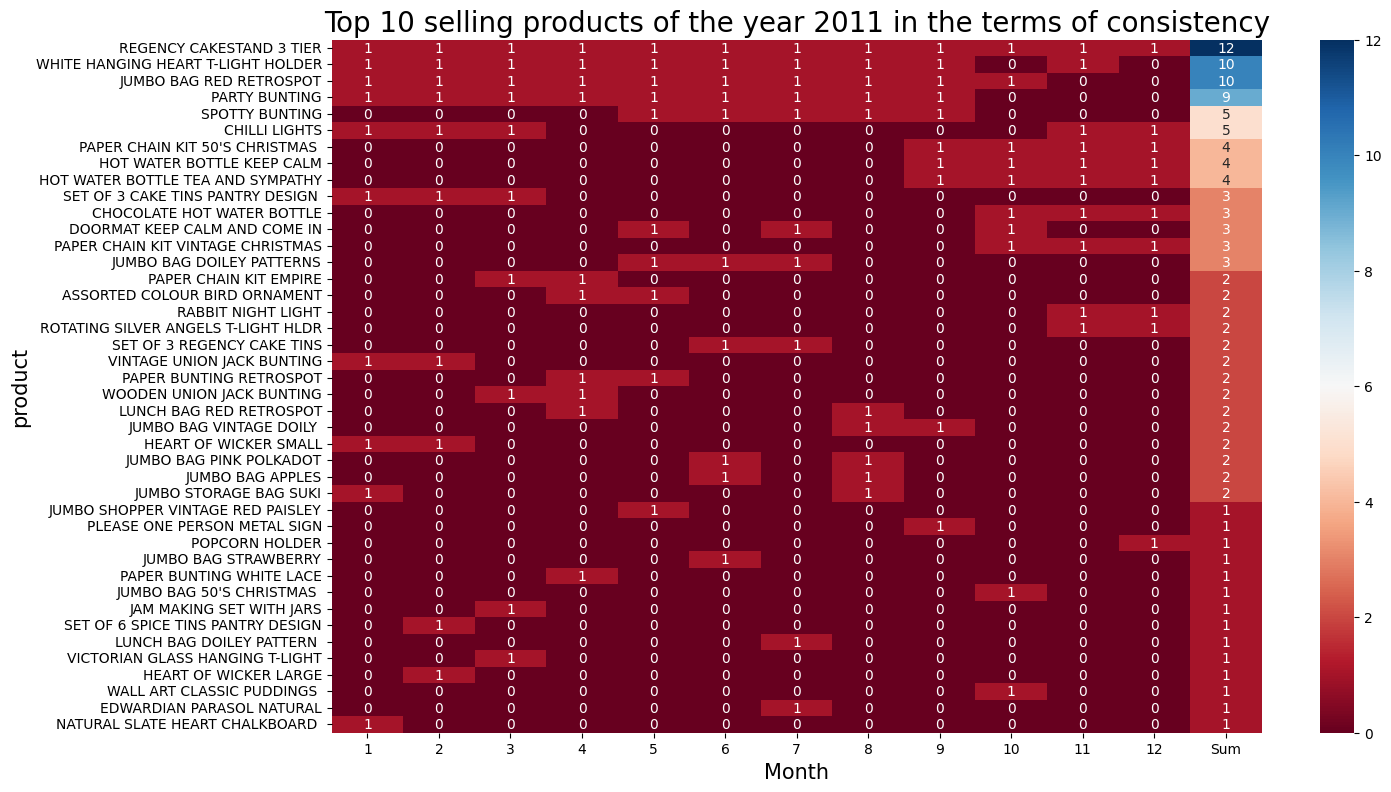

In [158]:
plt.figure(figsize=(15,9))
sns.heatmap(top_10_by_2011_month_map.sort_values(by = "Sum", ascending=False), 
            cmap="RdBu",  # Choose a color map
            annot=True,    # Annotate the cells with the values (0 or 1)
            cbar=True)    # Disable the color bar
plt.xlabel("Month",fontsize = 15)
plt.ylabel("product",fontsize = 15)
plt.title("Top 10 selling products of the year 2011 in the terms of consistency", fontsize = 20);


Text(0.5, 1.0, 'Top 20 selling products in the month of the year 2011 in terms of revenue')

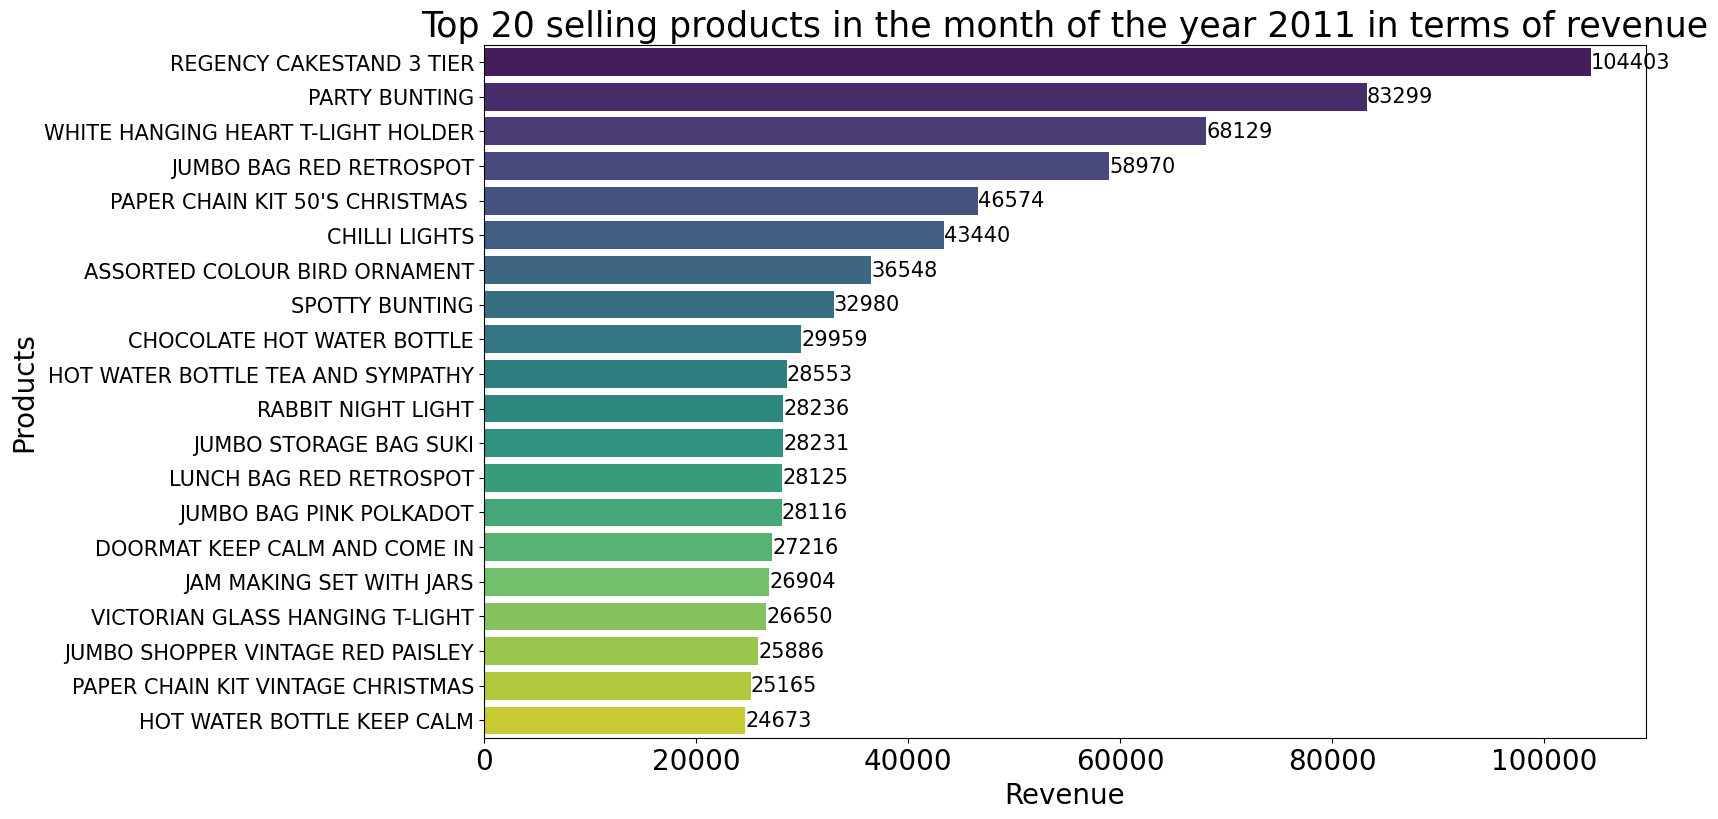

In [172]:
plt.figure(figsize=(15,9))
ax = sns.barplot(
    x = UK_sales.groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(20).values,
    y = UK_sales.groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(20).index,palette='viridis' )

plt.yticks(fontsize=15)
plt.xticks(fontsize=20)

for container in ax.containers:
    ax.bar_label(container, fontsize=15)
plt.xlabel("Revenue",fontsize = 20)
plt.ylabel("Products",fontsize = 20)
plt.title("Top 20 selling products in the month of the year 2011 in terms of revenue", fontsize = 25)


# Bivariate

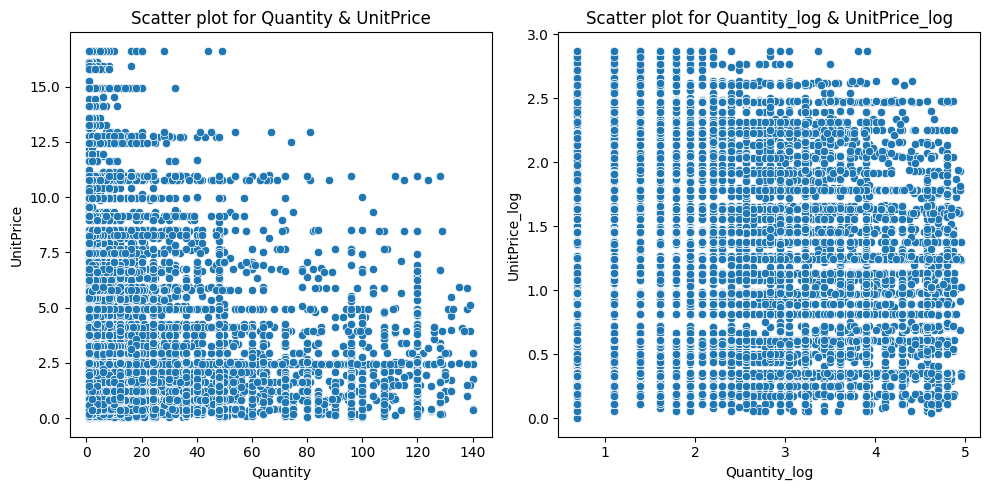

In [21]:

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)  # Arrange the subplots in a 2x2 grid
sns.scatterplot(data = UK_sales, x="Quantity", y="UnitPrice")
plt.title("Scatter plot for Quantity & UnitPrice")
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")

plt.subplot(1,2,2)  # Arrange the subplots in a 2x2 grid
sns.scatterplot(data = UK_sales, x="Quantity_log", y="UnitPrice_log")
plt.title("Scatter plot for Quantity_log & UnitPrice_log")
plt.xlabel("Quantity_log")
plt.ylabel("UnitPrice_log")

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

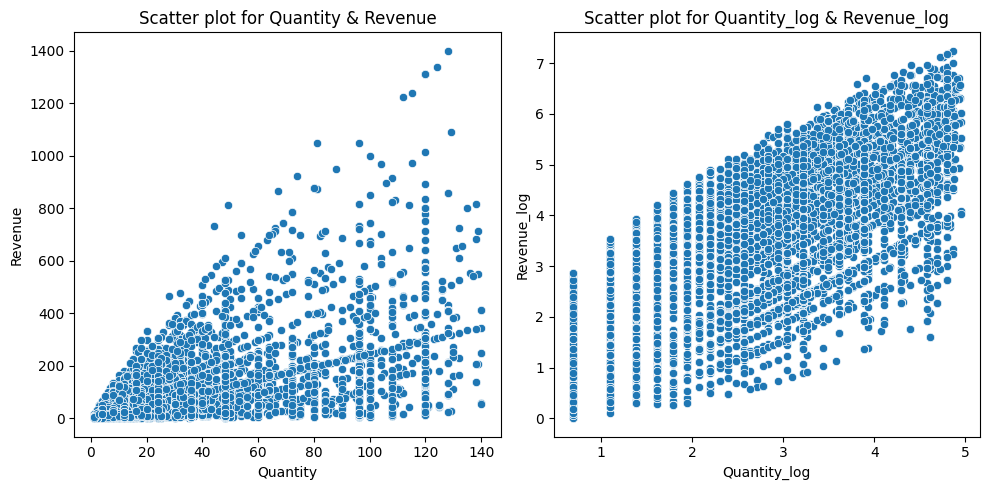

In [76]:

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)  # Arrange the subplots in a 2x2 grid
sns.scatterplot(data = UK_sales, x="Quantity", y="Revenue")
plt.title("Scatter plot for Quantity & Revenue")
plt.xlabel("Quantity")
plt.ylabel("Revenue")

plt.subplot(1,2,2)  # Arrange the subplots in a 2x2 grid
sns.scatterplot(data = UK_sales, x="Quantity_log", y="Revenue_log")
plt.title("Scatter plot for Quantity_log & Revenue_log")
plt.xlabel("Quantity_log")
plt.ylabel("Revenue_log")

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

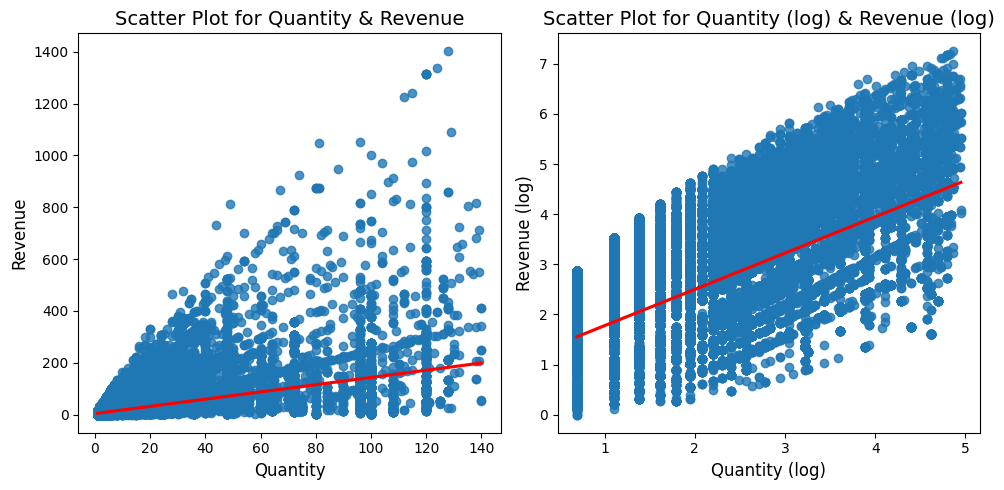

In [87]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.regplot(data=UK_sales, x="Quantity", y="Revenue", line_kws={'color': 'red'})
plt.title("Scatter Plot for Quantity & Revenue", fontsize=14)
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Revenue", fontsize=12)

# Second subplot: Scatter plot for Quantity (log) & Revenue (log)
plt.subplot(1, 2, 2)
sns.regplot(data=UK_sales, x="Quantity_log", y="Revenue_log", line_kws={'color': 'red'})
plt.title("Scatter Plot for Quantity (log) & Revenue (log)", fontsize=14)
plt.xlabel("Quantity (log)", fontsize=12)
plt.ylabel("Revenue (log)", fontsize=12)

plt.tight_layout()


In [85]:
UK_sales.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Quantity_log', 'UnitPrice_log',
       'Revenue', 'Revenue_log', 'Year', 'Month', 'Day'],
      dtype='object')

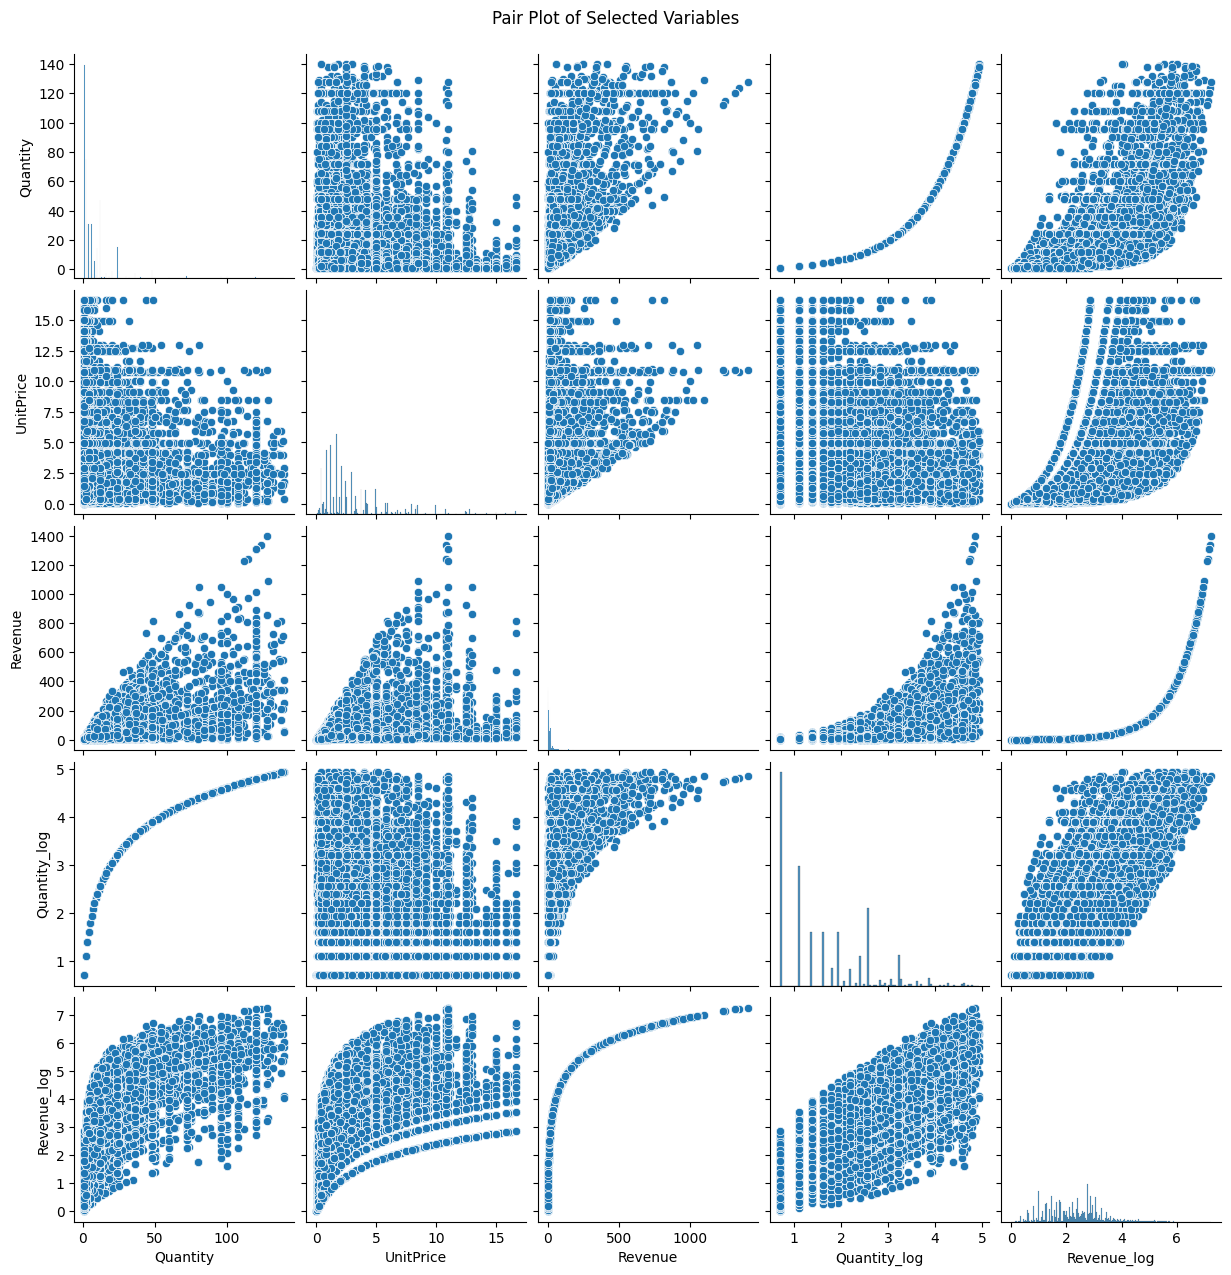

In [88]:
# Pair plot for selected numerical variables
sns.pairplot(UK_sales[['Quantity', 'UnitPrice', 'Revenue', 'Quantity_log', 'Revenue_log']])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

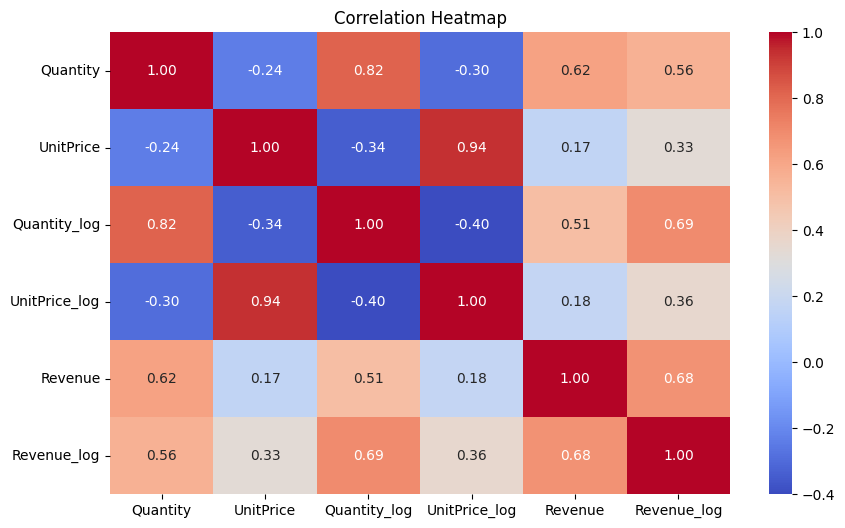

In [89]:
numerical_cols = ['Quantity', 'UnitPrice', 'Quantity_log', 'UnitPrice_log', 'Revenue', 'Revenue_log']

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(UK_sales[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [177]:
# UK_sales.to_csv("UK_data_for_ML.csv",index=False